In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/logistic.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<ipython-input-5-5066f06580d9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix = data.corr()


<Axes: >

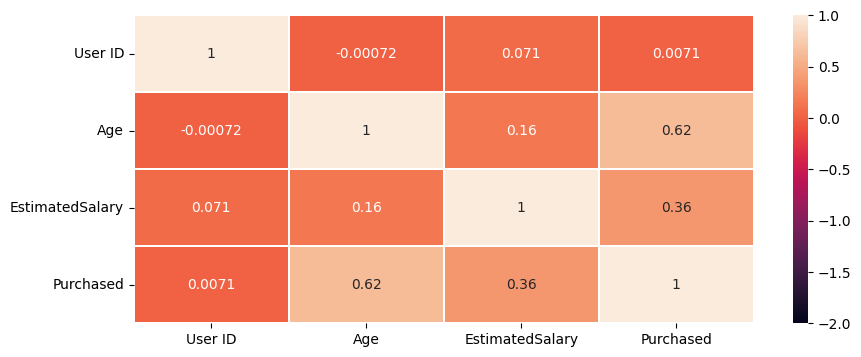

In [5]:
corrmatrix = data.corr()
plt.subplots(figsize=(10,4))

sns.heatmap(corrmatrix,vmin=-2,vmax=1,annot=True,linewidths=0.2)

In [6]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [7]:
y=data['Purchased']
x=data.drop(['Purchased'],axis=1)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [9]:
x_test

,User ID,Gender,Age,EstimatedSalary
209,15697424,Female,46,22000
280,15609669,Female,59,88000
33,15776733,Female,28,44000
210,15724536,Female,48,96000
93,15699284,Female,29,28000
...,...,...,...,...
314,15747097,Female,39,79000
373,15708791,Male,59,130000
380,15683758,Male,42,64000
239,15772073,Female,53,143000


In [10]:
y_test

209    0
280    1
33     0
210    1
93     0
      ..
314    0
373    1
380    0
239    1
75     1
Name: Purchased, Length: 100, dtype: int64

In [11]:
data1=data.drop(['User ID','Gender'],axis=1)
data1.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [12]:
y=data1['Purchased']
x=data1.drop(['Purchased'],axis=1)

In [13]:
x.shape

(400, 2)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model = rf.fit(x_train,y_train)

In [17]:
print(y_test)

209    0
280    1
33     0
210    1
93     0
      ..
314    0
373    1
380    0
239    1
75     1
Name: Purchased, Length: 100, dtype: int64


In [20]:
predictions=model.predict(x_test)

In [21]:
print(predictions)

[1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0
 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0]


In [22]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))

MSE is: 0.11
